In [14]:
import numpy as np
import pandas as pd

np.random.seed(67)

n_classes = 3
n_obs_per_class = 20
n_features = 50

data = []
labels = []

for class_id in range(n_classes):
    mean_shift = np.zeros(n_features)
    mean_shift[:5] = class_id * 2
    
    class_data = np.random.normal(loc=mean_shift, scale=1.0, size=(n_obs_per_class, n_features))
    
    data.append(class_data)
    labels.extend([class_id] * n_obs_per_class)

X = np.vstack(data)
y = np.array(labels)

df = pd.DataFrame(X, columns=[f"Var{i+1}" for i in range(n_features)])
df["Class"] = y

print(df.shape)
df.head()

(60, 51)


,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var42,Var43,Var44,Var45,Var46,Var47,Var48,Var49,Var50,Class
0,1.128522,0.144192,-1.115259,1.231047,-0.154658,-0.598387,0.348992,1.220590,-0.828710,-1.111059,...,-0.112448,-1.268209,0.693560,-0.733104,1.825461,-0.542845,-0.428675,1.298150,-0.187316,0
1,-1.625162,0.171199,0.998721,-0.753072,-0.155969,-1.353352,-0.508438,-0.642441,-1.082769,0.419924,...,-0.794410,-1.000170,-0.109478,-0.945520,0.463507,0.765820,0.770248,0.617435,0.385865,0
2,-1.004158,-0.927005,-1.300834,0.689173,-0.363391,1.504925,-0.653638,-0.259949,0.707442,-0.042887,...,0.944769,-0.594033,-1.173801,-0.092016,0.135533,-0.033977,-1.285883,0.941032,0.076042,0
3,-0.749854,-0.644565,-1.633844,1.193066,-0.652957,-0.150307,0.053362,0.011234,1.012606,0.155570,...,1.499244,0.651136,-0.546928,0.690408,0.720853,2.611067,1.963099,-0.608866,1.020380,0
4,0.254735,0.063640,1.653682,0.122274,0.800946,0.921891,0.003504,-1.011480,-0.836422,0.082595,...,-0.544887,-1.105294,-1.873340,-0.632110,0.591903,-0.691596,-0.042187,0.489304,-0.347755,0


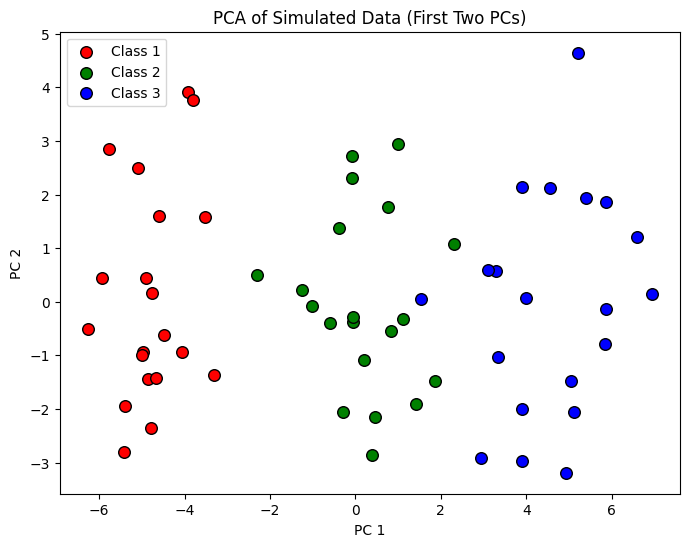

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
for class_id, color in zip(range(3), ["red", "green", "blue"]):
    plt.scatter(
        X_pca[y == class_id, 0],
        X_pca[y == class_id, 1],
        label=f"Class {class_id+1}",
        color=color,
        edgecolor="k",
        s=70
    )

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA of Simulated Data (First Two PCs)")
plt.legend()
plt.show()


In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=67)
cluster_labels = kmeans.fit_predict(X)

comparison = pd.crosstab(y, cluster_labels, rownames=["True Class"], colnames=["Cluster"])
comparison

Cluster,0,1,2
True Class,,,
0,0,0,20
1,2,16,2
2,2,18,0


The K-means clustering with $K=3$ generally captures the structure of the data, but it is not a perfect match to the true class labels. True Class 0 is perfectly identified, with all 20 observations assigned to Cluster 2. True Class 1 is mostly assigned to Cluster 0 (19 out of 20 observations), with one observation misclassified into Cluster 2. True Class 2 is mostly assigned to Cluster 1 (19 out of 20 observations), with one observation misclassified into Cluster 0. Overall, the clustering aligns closely with the true classes, but there are a few misclassifications, likely due to overlapping features or variability in the simulated data. The arbitrary numbering of K-means clusters means that the cluster labels do not correspond directly to the true class labels, but the assignment patterns clearly reveal the three distinct groups.

In [ ]:
kmeans_2 = KMeans(n_clusters=2, random_state=67)
cluster_labels_2 = kmeans_2.fit_predict(X)

comparison_2 = pd.crosstab(y, cluster_labels_2, rownames=["True Class"], colnames=["Cluster"])
print(comparison_2)

Cluster      0   1
True Class        
0           20   0
1            3  17
2            0  20


When K-means clustering is performed with $K=2$, the algorithm divides the 60 observations into two clusters, but it cannot fully separate the three true classes. True Class 0 is perfectly captured in Cluster 0, with all 20 observations correctly assigned. True Class 2 is mostly assigned to Cluster 1, while True Class 1 is split between the two clusters: 17 observations are assigned to Cluster 1 and 3 to Cluster 0. This indicates that K-means has merged True Classes 1 and 2 into a single cluster, reflecting the limitation of forcing the data into fewer clusters than the actual number of underlying groups. Overall, the results illustrate that choosing $K$ smaller than the true number of classes can lead to cluster merging and loss of class-level distinctions.

In [19]:
kmeans_4 = KMeans(n_clusters=4, random_state=67)
cluster_labels_4 = kmeans_4.fit_predict(X)

comparison_4 = pd.crosstab(y, cluster_labels_4, rownames=["True Class"], colnames=["Cluster"])
print(comparison_4)

Cluster     0   1   2   3
True Class               
0           0   0  20   0
1           2  16   2   0
2           1   1   0  18


When K-means clustering is performed with $K=4$, the algorithm divides the observations into four clusters. True Class 0 is perfectly captured in Cluster 2. True Class 2 is mostly assigned to Cluster 3, with one observation misclassified into Cluster 0 and one into Cluster 1. True Class 1 is split mainly between Cluster 1 (16 observations) and a few misclassified into Clusters 0 and 2. This indicates that increasing $K$ beyond the true number of classes can lead to splitting of natural groups, producing additional clusters that do not correspond to distinct classes. Overall, the clustering is mostly consistent with the true class structure, but the extra cluster introduces fragmentation.

In [20]:
kmeans_pca = KMeans(n_clusters=3, random_state=67)
cluster_labels_pca = kmeans_pca.fit_predict(X_pca)

comparison_pca = pd.crosstab(y, cluster_labels_pca, rownames=["True Class"], colnames=["Cluster"])
print(comparison_pca)

Cluster      0   1   2
True Class            
0            0   0  20
1           19   0   1
2            1  19   0


Performing K-means clustering on the first two principal component score vectors produces results that are essentially identical to clustering on the full 50-dimensional data. True Class 0 is perfectly assigned to Cluster 2. True Class 1 is mostly assigned to Cluster 0, with one observation misclassified into Cluster 2. True Class 2 is mostly assigned to Cluster 1, with one observation misclassified into Cluster 0. This shows that the first two principal components capture the key structure of the data that distinguishes the three classes, and clustering on these reduced dimensions can recover the class groupings just as accurately as clustering on the raw data. It also highlights how PCA can simplify high-dimensional data without losing critical information for clustering.

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans_scaled = KMeans(n_clusters=3, random_state=67)
cluster_labels_scaled = kmeans_scaled.fit_predict(X_scaled)

comparison_scaled = pd.crosstab(y, cluster_labels_scaled, rownames=["True Class"], colnames=["Cluster"])
print(comparison_scaled)

Cluster      0  1   2
True Class           
0            0  5  15
1            3  4  13
2           14  1   5


When K-means clustering is performed on the standardized data, the results differ substantially from those obtained on the raw data. True Class 0 is mostly assigned to Cluster 2, but five observations are misclassified into Cluster 1. True Class 1 is also primarily in Cluster 2, with some observations scattered across Clusters 0 and 1. True Class 2 is now largely misclassified, with 14 observations assigned to Cluster 0, one to Cluster 1, and only five correctly assigned to Cluster 2. This demonstrates that scaling all variables to have standard deviation one can dilute the influence of the original mean shifts applied to a subset of variables, which were the key features separating the classes. As a result, clustering performance worsens significantly compared to using the unscaled data.